# PyCaret 2 Classification of Radiomics Data
This notebook runs the grand model once the abruptness, shape, orientation, and radiomics data has all been combined.

# 1. Data Repository

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('spreadsheets/Radiomics_Reduced.csv',skiprows=0)

In [3]:
data = df

# 2. Initialize Setup

In [4]:
from pycaret.classification import *
clf1 = setup(data, target = 'histology_actual', session_id=123, log_experiment=False, experiment_name='exp1',fix_imbalance=True, ignore_features=['filename', 'histology_rle'])

,Description,Value
0,session_id,123
1,Target,histology_actual
2,Target Type,Binary
3,Label Encoded,"Benign: 0, Malignant: 1"
4,Original Data,"(135, 29)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8633,0.0000,0.7333,0.8583,0.7338,0.6523,0.6937,0.1180
et,Extra Trees Classifier,0.8500,0.9246,0.7333,0.8167,0.7229,0.6289,0.6658,0.3900
rf,Random Forest Classifier,0.8400,0.8794,0.7000,0.7600,0.6731,0.5929,0.6353,0.8480
lda,Linear Discriminant Analysis,0.8078,0.8413,0.7000,0.7917,0.6933,0.5618,0.5998,0.0330
gbc,Gradient Boosting Classifier,0.7967,0.8825,0.7000,0.6350,0.6260,0.5061,0.5395,0.2800
lightgbm,Light Gradient Boosting Machine,0.7889,0.8952,0.6667,0.6617,0.6062,0.4854,0.5297,0.0850
ada,Ada Boost Classifier,0.7867,0.8333,0.6333,0.6933,0.6160,0.4805,0.5090,0.3080
dt,Decision Tree Classifier,0.7544,0.7143,0.6000,0.5683,0.5674,0.4053,0.4156,0.1170
lr,Logistic Regression,0.7033,0.7214,0.5667,0.4212,0.4690,0.2853,0.3110,1.5780
qda,Quadratic Discriminant Analysis,0.6911,0.4929,0.0000,0.0000,0.0000,0.0000,0.0000,0.0750


# 4. Create Models

In [ ]:
ridge_model = create_model('ridge')
rf_model = create_model('rf')
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.8571,0.6667,1.0000,0.8000,0.7368,0.7638
1,0.8000,1.0000,0.3333,1.0000,0.5000,0.4118,0.5092
2,0.9000,1.0000,1.0000,0.7500,0.8571,0.7826,0.8018
3,0.9000,1.0000,1.0000,0.7500,0.8571,0.7826,0.8018
4,0.8889,1.0000,1.0000,0.6667,0.8000,0.7273,0.7559
5,0.8889,0.9444,0.6667,1.0000,0.8000,0.7273,0.7559
6,0.7778,0.8889,0.3333,1.0000,0.5000,0.4000,0.5000
7,0.6667,0.6111,0.3333,0.5000,0.4000,0.1818,0.1890
8,0.8889,0.9444,1.0000,0.7500,0.8571,0.7692,0.7906
9,0.8889,1.0000,1.0000,0.7500,0.8571,0.7692,0.7906


In [ ]:
tuned_ridge_model = tune_model(ridge_model)
tuned_rf_model = tune_model(rf_model)
tuned_et_model = tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9524,0.6667,1.0000,0.8000,0.7368,0.7638
1,0.8000,0.9524,0.3333,1.0000,0.5000,0.4118,0.5092
2,0.9000,0.9048,1.0000,0.7500,0.8571,0.7826,0.8018
3,0.9000,1.0000,1.0000,0.7500,0.8571,0.7826,0.8018
4,0.8889,1.0000,1.0000,0.6667,0.8000,0.7273,0.7559
5,0.8889,0.8889,0.6667,1.0000,0.8000,0.7273,0.7559
6,0.7778,0.8889,0.3333,1.0000,0.5000,0.4000,0.5000
7,0.7778,0.6111,0.6667,0.6667,0.6667,0.5000,0.5000
8,0.8889,0.8889,1.0000,0.7500,0.8571,0.7692,0.7906
9,0.8889,0.9444,1.0000,0.7500,0.8571,0.7692,0.7906


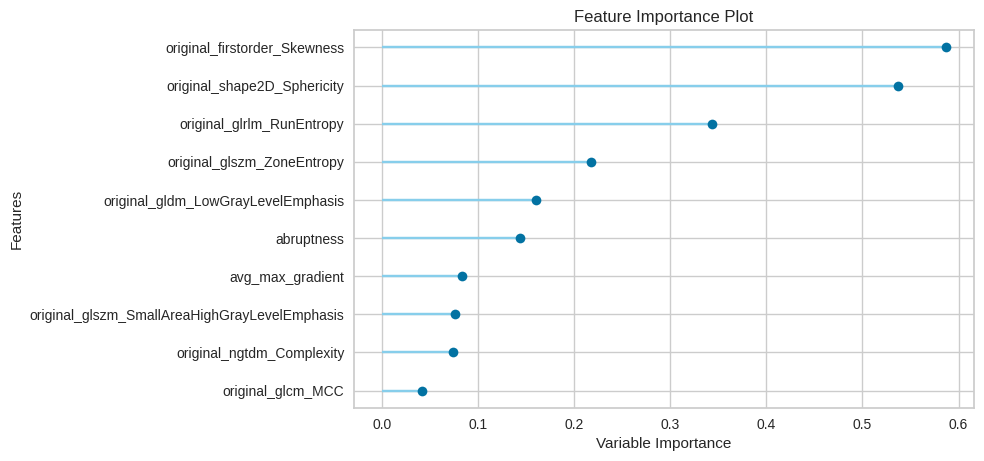

In [ ]:
plot_model(tuned_ridge_model, plot='feature')

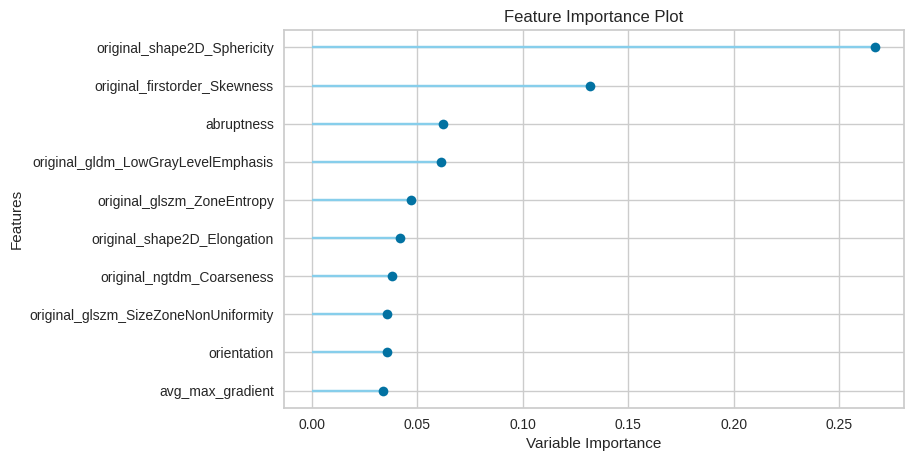

In [ ]:
plot_model(tuned_rf_model, plot='feature')

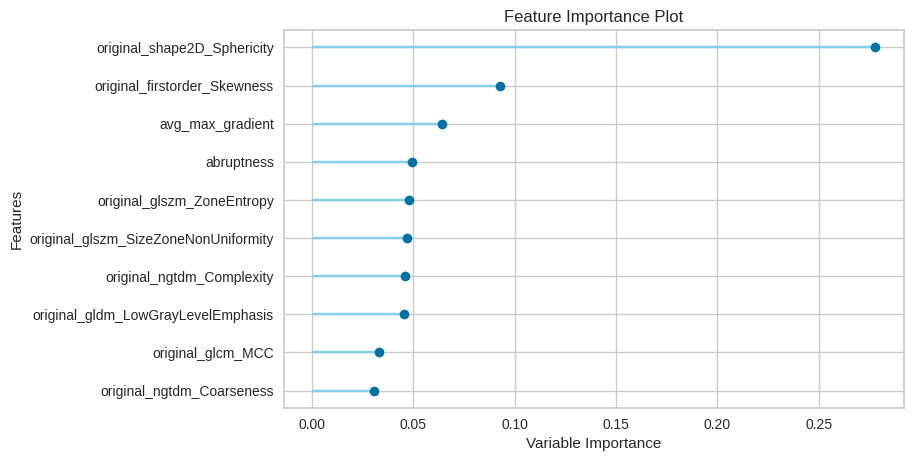

In [ ]:
plot_model(tuned_et_model, plot='feature')

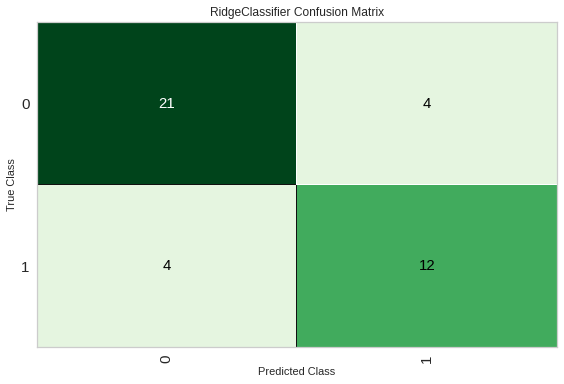

In [ ]:
plot_model(tuned_ridge_model,plot='confusion_matrix')

In [ ]:
plot_model(tuned_ridge_model, plot = 'class_report')

In [ ]:
evaluate_model(tuned_ridge_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
evaluate_model(tuned_rf_model)

In [ ]:
evaluate_model(tuned_et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pred_df_ridge = predict_model(tuned_ridge_model, raw_score=True)
# Add some of the important columns back in
for i, row in pred_df_ridge.iterrows():
  pred_df_ridge.at[i, 'hist_rle'] = data.iloc[test_data.index[i]]['histology_rle']
  pred_df_ridge.at[i,'fname'] = data.iloc[test_data.index[i]]['filename']
pred_df_ridge.insert(0, 'fname', pred_df_ridge.pop('fname'))
pred_df_ridge.insert(1, 'histology_actual', pred_df_ridge.pop('histology_actual'))
pred_df_ridge.insert(2, 'hist_rle', pred_df_ridge.pop('hist_rle'))
pred_df_ridge.insert(3, 'Label', pred_df_ridge.pop('Label'))
pred_df_ridge

In [ ]:
pred_df_rf = predict_model(tuned_rf_model, raw_score=True)
# Add some of the important columns back in
for i, row in pred_df_rf.iterrows():
  pred_df_rf.at[i, 'hist_rle'] = data.iloc[test_data.index[i]]['histology_rle']
  pred_df_rf.at[i,'fname'] = data.iloc[test_data.index[i]]['filename']
pred_df_rf.insert(0, 'fname', pred_df_rf.pop('fname'))
pred_df_rf.insert(1, 'histology_actual', pred_df_rf.pop('histology_actual'))
pred_df_rf.insert(2, 'hist_rle', pred_df_rf.pop('hist_rle'))
pred_df_rf.insert(3, 'Label', pred_df_rf.pop('Label'))
pred_df_rf.insert(4, 'Score_Benign', pred_df_rf.pop('Score_Benign'))
pred_df_rf.insert(5, 'Score_Malignant', pred_df_rf.pop('Score_Malignant'))
pred_df_rf

In [ ]:
pred_df_et = predict_model(tuned_et_model, raw_score=True)
# Add some of the important columns back in
for i, row in pred_df_et.iterrows():
  pred_df_et.at[i, 'hist_rle'] = data.iloc[test_data.index[i]]['histology_rle']
  pred_df_et.at[i,'fname'] = data.iloc[test_data.index[i]]['filename']
pred_df_et.insert(0, 'fname', pred_df_et.pop('fname'))
pred_df_et.insert(1, 'histology_actual', pred_df_et.pop('histology_actual'))
pred_df_et.insert(2, 'hist_rle', pred_df_et.pop('hist_rle'))
pred_df_et.insert(3, 'Label', pred_df_et.pop('Label'))
pred_df_et.insert(4, 'Score_Benign', pred_df_et.pop('Score_Benign'))
pred_df_et.insert(5, 'Score_Malignant', pred_df_et.pop('Score_Malignant'))
pred_df_et

In [ ]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [ ]:
confusion_matrix(pred_df_ridge, "histology_actual", "Label")  # Precision = 22/28 = .785, Recall = 22/26 = .846

Label,Benign,Malignant
histology_actual,,
Benign,19,6
Malignant,2,14


In [ ]:
confusion_matrix(pred_df_rf, "histology_actual", "Label") # Precision = 24/28 = .8333 Recall = 24/28 = .83333

NameError: ignored

In [ ]:
confusion_matrix(pred_df_et, "histology_actual", "Label") # Precision = 23/28 = .821 Recall = 23/27 = .852

Label,Benign,Malignant
histology_actual,,
Benign,22,3
Malignant,6,10


In [ ]:
confusion_matrix(pred_df_et, "histology_actual", "hist_rle")

hist_rle,Benign,Malignant
histology_actual,,
Benign,24,1
Malignant,3,13
